## Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv', index_col=0)
df.head()

,date,NY_cgas,US_cgas,WTI_crude_oil,Brent_crude_oil,NY_diesel,US__diesel,LA_diesel,LA_gas,NY_hoil,US_jet_fuel,TX_propane,Open,High,Low,Close,Volume,up/down,Sentiment,true_value
0,2006-06-14,1.962,2.034,69.12,65.52,2.104,2.152,2.244,2.276,1.889,2.079,1.091,0.068713,0.063172,0.065933,0.068743,0.460489,1.0,1.190048,1.0
1,2006-06-15,1.987,2.033,69.78,66.04,2.105,2.145,2.220,2.297,1.895,2.085,1.091,0.075076,0.090463,0.076817,0.095106,0.518642,1.0,1.158031,-1.0
2,2006-06-16,1.952,1.996,69.75,65.01,2.088,2.085,2.203,2.323,1.868,2.048,1.093,0.101277,0.088083,0.093387,0.090443,0.522922,-1.0,1.130272,-1.0
3,2006-06-19,1.941,2.006,69.21,66.40,2.041,2.021,2.168,2.286,1.828,1.983,1.086,0.096648,0.087742,0.084086,0.078927,0.378910,-1.0,1.222131,-1.0
4,2006-06-20,1.956,2.021,69.30,67.57,2.048,2.028,2.153,2.296,1.836,1.991,1.083,0.085206,0.080794,0.085813,0.078917,0.225128,0.0,1.184609,1.0


In [3]:
y = df["true_value"]
X = df.iloc[:, 1:-1]

In [4]:
y

0       1.0
1      -1.0
2      -1.0
3      -1.0
4       1.0
       ... 
3962   -1.0
3963    1.0
3964    1.0
3965    1.0
3966   -1.0
Name: true_value, Length: 3967, dtype: float64

In [5]:
X

,NY_cgas,US_cgas,WTI_crude_oil,Brent_crude_oil,NY_diesel,US__diesel,LA_diesel,LA_gas,NY_hoil,US_jet_fuel,TX_propane,Open,High,Low,Close,Volume,up/down,Sentiment
0,1.962,2.034,69.12,65.52,2.104,2.152,2.244,2.276,1.889,2.079,1.091,0.068713,0.063172,0.065933,0.068743,0.460489,1.0,1.190048
1,1.987,2.033,69.78,66.04,2.105,2.145,2.220,2.297,1.895,2.085,1.091,0.075076,0.090463,0.076817,0.095106,0.518642,1.0,1.158031
2,1.952,1.996,69.75,65.01,2.088,2.085,2.203,2.323,1.868,2.048,1.093,0.101277,0.088083,0.093387,0.090443,0.522922,-1.0,1.130272
3,1.941,2.006,69.21,66.40,2.041,2.021,2.168,2.286,1.828,1.983,1.086,0.096648,0.087742,0.084086,0.078927,0.378910,-1.0,1.222131
4,1.956,2.021,69.30,67.57,2.048,2.028,2.153,2.296,1.836,1.991,1.083,0.085206,0.080794,0.085813,0.078917,0.225128,0.0,1.184609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,3.857,3.690,110.32,115.13,3.964,3.594,3.974,3.922,3.894,3.517,1.198,2.769766,2.824832,2.796829,2.837995,0.852602,1.0,-0.469044
3963,3.849,3.794,112.55,115.77,3.981,3.721,3.973,3.929,3.911,3.636,1.198,2.793333,2.798525,2.762400,2.805425,1.127906,-1.0,-0.533289
3964,3.898,3.843,112.88,116.41,4.064,3.834,3.998,4.122,3.994,3.741,1.198,2.779956,2.842354,2.813063,2.843022,1.355428,1.0,-0.645402
3965,3.927,3.887,116.19,119.81,4.031,3.938,4.123,4.143,3.961,3.823,1.198,2.835074,2.918473,2.873545,2.922868,1.160529,1.0,-0.683530


In [6]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scores = []

#run logistic model
log = LogisticRegression(random_state=42).fit(X_train, y_train)
scores = np.append(scores,log.score(X_test, y_test))

#run random forest
ran = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
scores = np.append(scores,ran.score(X_test, y_test))

#run decision tree
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
scores = np.append(scores,tree.score(X_test, y_test))

#run SVM 
svm = SVC(gamma='auto').fit(X_train, y_train)
scores = np.append(scores,svm.score(X_test, y_test))

#run KNN
neighbor = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
scores = np.append(scores,neighbor.score(X_test, y_test))


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Models')

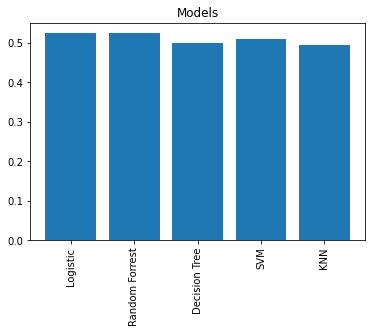

In [7]:
plt.figure()
plt.bar(range(5), scores)
labels = ['Logistic','Random Forrest','Decision Tree','SVM','KNN']
plt.xticks(range(5),labels,rotation='vertical')
plt.title('Models')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

In [8]:
scores

array([0.52519084, 0.52519084, 0.50076336, 0.50992366, 0.49465649])

In [9]:
# from sklearn.metrics import roc_auc_score, roc_curve
# import matplotlib.pyplot as plt

# prob = clf.predict_proba(X_test)
# prob = prob[:,1]

# roc_auc = roc_auc_score(y_test, prob)
# fpr, tpr, thresholds = roc_curve(y_test, prob)

# # plotting the ROC curve
# plt.figure(dpi=100)
# plt.plot(fpr, tpr)
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# print('Area under the Receiver Operating Characteristic curve:', 
#       roc_auc)

In [10]:
# from sklearn.model_selection import validation_curve
# from sklearn.metrics import r2_score
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# def PolynomialRegression(degree=7, **kwargs):
#     return make_pipeline(PolynomialFeatures(degree),
#                          LinearRegression(**kwargs))

In [11]:
# degree = np.arange(0, 16)
# train_score, val_score = validation_curve(PolynomialRegression(), X, y,
#                                              param_name='polynomialfeatures__degree', 
#                                              param_range = degree, # what parameters to iterate over
#                                              cv=5, # number of validation folds, can also put in a KFold or StratifiedKFold object here
#                                              scoring = 'r2' # uses R-squared... 1 is perfect, below 0 is worse than guessing mean of training set y-values
#                                          )

# plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
# plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
# plt.legend(loc='best')
# plt.ylim(-.25, 1.25)
# plt.xlabel('degree')
# plt.ylabel('score');
# sns.despine()